In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d  # Optional, for 3D visualization
import matplotlib.cm as cm

In [56]:
file_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/pointcloud_time_series/C-3/DoN/processed_s_pc_C-3_2024-08-07_dense_02_DoN.ply"
save_dir = "/Users/noahbucher/Documents/Uni/Master Thesis/Writing/graphs/results/segmentation"  # Set your save directory

# Read the point cloud
pcd = o3d.io.read_point_cloud(file_path)

# create np array from point cloud
points = np.asarray(pcd.points)

# print first line of points
print(points[0])


[0.05118564 0.11102023 0.12555018]


In [9]:
# Get the point cloud data
points = np.asarray(pcd.points)  # Extract the coordinates (X, Y, Z)
colors = np.asarray(pcd.colors)  # Assuming DoN magnitudes are stored as colors

# Extract X and Z coordinates
x_coords = points[:, 0]
z_coords = points[:, 2]

# Assuming DoN magnitudes are stored in the red channel (you can adjust this based on where DoN is stored)
DoN_magnitudes = colors[:, 0]  # Adjust if necessary (e.g., [:, 1] or [:, 2] for other channels)


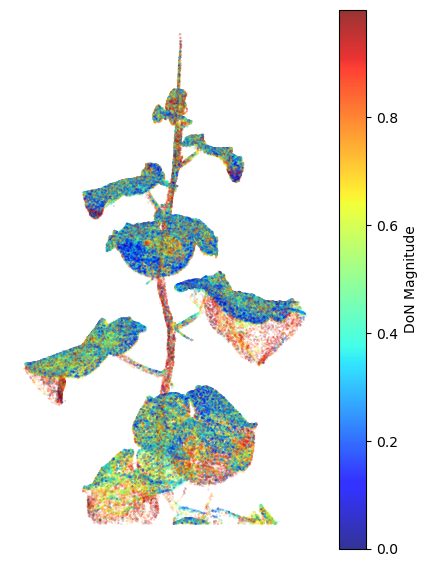

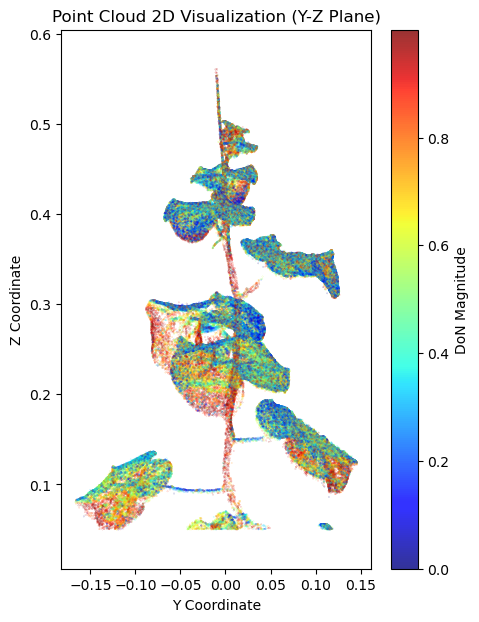

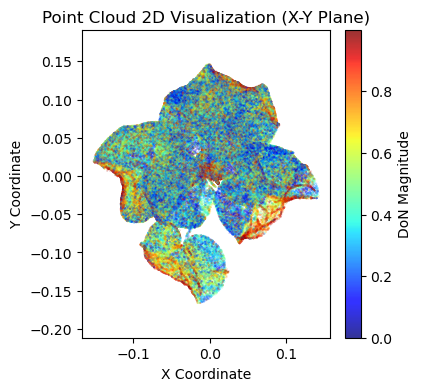

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def read_custom_ply_with_DoN(file_path):
    """
    Read a PLY file with a custom DoN_magnitude field and extract the point coordinates and DoN magnitudes.
    
    Args:
        file_path (str): Path to the PLY file.
    
    Returns:
        np.ndarray: X, Y, Z coordinates of the point cloud.
        np.ndarray: DoN magnitudes for each point.
    """
    points = []
    don_magnitudes = []

    with open(file_path, 'r') as ply_file:
        in_vertex_section = False
        
        for line in ply_file:
            # Find the start of the vertex data section
            if line.startswith("end_header"):
                in_vertex_section = True
                continue
            
            if in_vertex_section:
                # Extract point coordinates (X, Y, Z) and DoN_magnitude
                elements = line.strip().split()
                x, y, z = map(float, elements[:3])  # First 3 columns are X, Y, Z
                don_magnitude = float(elements[3])  # Fourth column is DoN_magnitude
                points.append([x, y, z])
                don_magnitudes.append(don_magnitude)

    points = np.array(points)
    don_magnitudes = np.array(don_magnitudes)
    
    return points, don_magnitudes

# Path to the PLY file
file_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/pointcloud_time_series/C-3/DoN/processed_s_pc_C-3_2024-08-07_dense_02_DoN.ply"

# Read the point cloud and DoN magnitudes
points, don_magnitudes = read_custom_ply_with_DoN(file_path)

figsize = (5,7)

# Extract X, Y, Z coordinates
x_coords = points[:, 0]  # X values
y_coords = points[:, 1]  # Y values
z_coords = points[:, 2]  # Z values

# Create a 2D scatter plot with color mapped to DoN magnitudes for X-Z plane
plt.figure(figsize=figsize)
scatter = plt.scatter(x_coords, z_coords, c=don_magnitudes, cmap='jet', s=0.01, alpha=0.8)
plt.colorbar(scatter, label="DoN Magnitude")
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
# plt.title('Point Cloud 2D Visualization (X-Z Plane)')
plt.axis('equal')  # Ensure equal aspect ratio
plt.axis('off')  # Turn off the axis
plt.show()

# Create a 2D scatter plot with color mapped to DoN magnitudes for Y-Z plane
plt.figure(figsize=figsize)
scatter = plt.scatter(y_coords, z_coords, c=don_magnitudes, cmap='jet', s=0.01, alpha=0.8)
plt.colorbar(scatter, label="DoN Magnitude")
plt.xlabel('Y Coordinate')
plt.ylabel('Z Coordinate')
plt.title('Point Cloud 2D Visualization (Y-Z Plane)')
plt.axis('equal')  # Ensure equal aspect ratio
plt.show()

# Create a 2D scatter plot with color mapped to DoN magnitudes for X-Y plane
plt.figure(figsize=(4,4))
scatter = plt.scatter(x_coords, y_coords, c=don_magnitudes, cmap='jet', s=0.01, alpha=0.8)
plt.colorbar(scatter, label="DoN Magnitude")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Point Cloud 2D Visualization (X-Y Plane)')
plt.axis('equal')  # Ensure equal aspect ratio
plt.show()


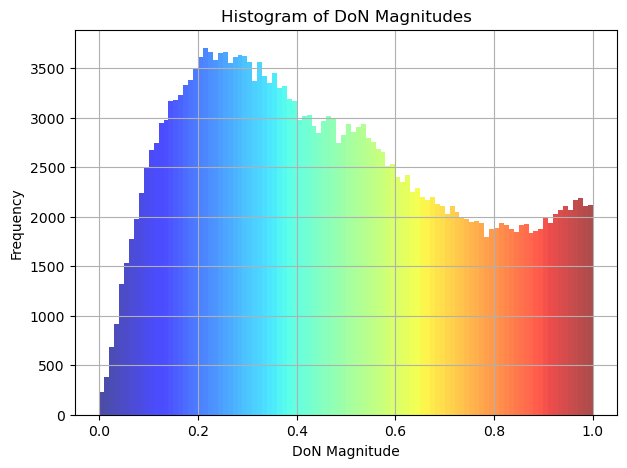

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def read_custom_ply_with_DoN(file_path):
    """
    Read a PLY file with a custom DoN_magnitude field and extract the point coordinates and DoN magnitudes.
    
    Args:
        file_path (str): Path to the PLY file.
    
    Returns:
        np.ndarray: X, Y, Z coordinates of the point cloud.
        np.ndarray: DoN magnitudes for each point.
    """
    points = []
    don_magnitudes = []

    with open(file_path, 'r') as ply_file:
        in_vertex_section = False
        
        for line in ply_file:
            # Find the start of the vertex data section
            if line.startswith("end_header"):
                in_vertex_section = True
                continue
            
            if in_vertex_section:
                # Extract point coordinates (X, Y, Z) and DoN_magnitude
                elements = line.strip().split()
                x, y, z = map(float, elements[:3])  # First 3 columns are X, Y, Z
                don_magnitude = float(elements[3])  # Fourth column is DoN_magnitude
                points.append([x, y, z])
                don_magnitudes.append(don_magnitude)

    points = np.array(points)
    don_magnitudes = np.array(don_magnitudes)
    
    return points, don_magnitudes

# Path to the PLY file
file_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/pointcloud_time_series/C-3/DoN/processed_s_pc_C-3_2024-08-07_dense_02_DoN.ply"

# Read the point cloud and DoN magnitudes
points, don_magnitudes = read_custom_ply_with_DoN(file_path)

figsize = (5,7)

# Create a histogram of DoN magnitudes with the 'jet' colormap
plt.figure(figsize=(7, 5))

# Normalize the DoN magnitudes for the colormap
norm = Normalize(vmin=np.min(don_magnitudes), vmax=np.max(don_magnitudes))
cmap = plt.get_cmap('jet')

# Calculate histogram
n, bins, patches = plt.hist(don_magnitudes, bins=100, color='blue', alpha=0.7)

# Map colors to the histogram bars
for patch, left_bin in zip(patches, bins[:-1]):
    color = cmap(norm(left_bin))  # Color each bar based on its bin position
    patch.set_facecolor(color)

# Add a color bar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(don_magnitudes)  # Attach the data for the colorbar
# plt.colorbar(sm, label="DoN Magnitude")

# Add title and labels
plt.title('Histogram of DoN Magnitudes')
plt.xlabel('DoN Magnitude')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


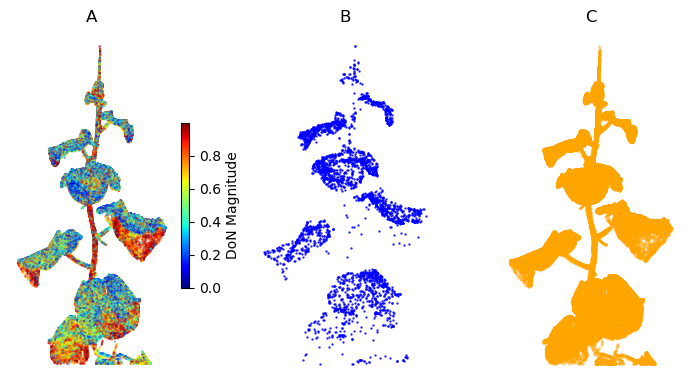

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def filter_by_threshold(points, don_magnitudes, threshold):
    """
    Filter the points and DoN magnitudes based on the given threshold.
    
    Args:
        points (np.ndarray): Point cloud coordinates.
        don_magnitudes (np.ndarray): DoN magnitudes.
        threshold (float): The DoN magnitude threshold for filtering.
    
    Returns:
        np.ndarray: Filtered points below the threshold.
        np.ndarray: Filtered points above the threshold.
    """
    # Create a mask for points with DoN magnitudes below and above the threshold
    mask_below = don_magnitudes < threshold
    mask_above = don_magnitudes >= threshold
    
    filtered_points_below = points[mask_below]
    filtered_points_above = points[mask_above]
    
    return filtered_points_below, filtered_points_above

# Path to the PLY file
file_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/pointcloud_time_series/C-3/DoN/processed_s_pc_C-3_2024-08-07_dense_02_DoN.ply"

# Read the point cloud and DoN magnitudes
points, don_magnitudes = read_custom_ply_with_DoN(file_path)

figsize = (7, 4)  # Adjusted size for 2 subplots

# Define a threshold for filtering DoN magnitudes
threshold = 0.05  # Example threshold value

# Filter points and DoN magnitudes based on the threshold
filtered_points_below, filtered_points_above = filter_by_threshold(points, don_magnitudes, threshold)

# Extract X and Z coordinates for points below the threshold
x_filtered_below = filtered_points_below[:, 0]
z_filtered_below = filtered_points_below[:, 2]

# Extract X and Z coordinates for points above the threshold
x_filtered_above = filtered_points_above[:, 0]
z_filtered_above = filtered_points_above[:, 2]

# Create a figure with 3 subplots: 2 for threshold filtering and 1 for DoN magnitudes
fig, axs = plt.subplots(1, 3, figsize=(7, 4))

# Plot for points below the threshold (blue)
axs[1].scatter(x_filtered_below, z_filtered_below, color='blue', s=0.5, alpha=0.8)
# axs[0].set_title(f'Points with DoN Magnitude < {threshold}')
axs[1].set_title(f'B')
axs[1].axis('off')  # Hide axes

# Plot for points above the threshold (orange)
axs[2].scatter(x_filtered_above, z_filtered_above, color='orange', s=0.05, alpha=0.8)
# axs[1].set_title(f'Points with DoN Magnitude >= {threshold}')
axs[2].set_title(f'C')
axs[2].axis('off')  # Hide axes

# Plot for the full point cloud colored by DoN magnitudes
scatter = axs[0].scatter(points[:, 0], points[:, 2], c=don_magnitudes, cmap='jet', s=0.05, alpha=0.8)
# axs[2].set_title(f'Point Cloud Colored by DoN Magnitude')
axs[0].set_title(f'A')
axs[0].axis('off')  # Hide axes

# Add a color bar for DoN magnitudes in the third subplot
norm = Normalize(vmin=np.min(don_magnitudes), vmax=np.max(don_magnitudes))
sm = ScalarMappable(cmap='jet', norm=norm)
sm.set_array(don_magnitudes)
cbar = fig.colorbar(sm, ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label("DoN Magnitude")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
